In [1]:
import sys
if '../' not in sys.path:
    sys.path.append('../')
    sys.path.append('../src')
    
from Channel import Channel
from Solution import Solution
from Random_Solution import Online_Solution
from Random_Solution import Result_Analyse

**Please change the PATH in file Channel.py**

# Initialization
loading data and preprocessing

Please Enter the testfile number you want to run

In [2]:
CASE = -1
while CASE not in [1,2,3,4,5]:
    print("Please input the testfile you want to check:")
    CASE = int(input())

Please input the testfile you want to check:
3


In [3]:
channel = Channel.read_testfile(CASE)

for i in range(Channel.N):
    channel[i].preprocess_simple()
    channel[i].preprocess_IP()
    channel[i].preprocess_LP()

In [4]:
S = Solution(channel)

# Greedy solution

In [5]:
%%time
S.greedy_solution()
S.get_answer()
S.show_answer()

Power budget: 100
[0 1]
[0.         0.17948718 0.82051282]
[0 1]
[0 1]
total power:  100.0 ; total utility:  372.1538461538462
Wall time: 0 ns


Standard linear programming for comparison

In [16]:
import numpy as np
from scipy import optimize

U = np.concatenate([channel[i].r for i in range(Channel.N)])
P = np.concatenate([channel[i].p for i in range(Channel.N)])

X = np.zeros((Channel.N, len(U)))
temp = 0
for i in range(Channel.N):
    X[i, temp:temp+channel[i].size()] = 1
    temp += channel[i].size()
    
P = np.row_stack((P, X))
B = [Channel.P] + [1 for i in range(Channel.N)]

bounds = [(0, 1) for i in range(len(U))]

res = optimize.linprog(-U, A_ub=P, b_ub=B, bounds=bounds)
print(res.x)
print('Max utility by standard linear programming:', -res.fun)

[1.60501878e-12 1.00000000e+00 2.58363798e-13 1.79487179e-01
 8.20512821e-01 1.76768838e-12 1.00000000e+00 1.76193184e-12
 1.00000000e+00]
Max utility by standard linear programming: 372.1538461541031


C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.


# DP solution

In [7]:
%%time
S.DP_solution()
S.get_answer()
S.show_answer()

Power budget: 100
channel(n)	 p	 r	 user(k), m
	 1 	 27 	 82 	 1 , 2
	 2 	 7 	 71 	 1 , 1
	 3 	 25 	 100 	 2 , 3
	 4 	 9 	 97 	 2 , 1
total power:  68 ; total utility:  350
Wall time: 0 ns


# DP solution 2

In [8]:
%%time
S.DP_solution_2()
S.get_answer()
S.show_answer()

Power budget: 100
channel(n)	 p	 r	 user(k), m
	 1 	 27 	 82 	 1 , 2
	 2 	 7 	 71 	 1 , 1
	 3 	 25 	 100 	 2 , 3
	 4 	 9 	 97 	 2 , 1
total power:  68 ; total utility:  350
Wall time: 31.1 ms


# Branch and bound

**Please not use the testfiles 4 and 5**

In [9]:
%%time
S.BB_solution()
S.get_answer()
S.show_answer()

[[1, 2, 1, 1, 4]]
[[0, 2, 1, 1, 1], [1, 1, 1, 1, 2], [1, 2, 0, 1, 3], [1, 2, 1, 0, 4]]
[[1, 1, 1, 1, 2], [1, 2, 0, 1, 3], [1, 2, 1, 0, 4]]
[[1, 2, 0, 1, 3], [1, 2, 1, 0, 4]]
[[1, 2, 1, 0, 4]]
Power budget: 100
channel(n)	 p	 r	 user(k), m
	 1 	 27 	 82 	 1 , 2
	 2 	 7 	 71 	 1 , 1
	 3 	 25 	 100 	 2 , 3
	 4 	 9 	 97 	 2 , 1
total power:  68 ; total utility:  350
Wall time: 0 ns


# Online Solution

In [10]:
t = Result_Analyse.statisticalAnalyse()

average best threshold:  55.3


total power consumed by online solution :  82
total rate gotten by online solution :  347
total power consumed by DP solution :  97
total rate gotten by DP solution :  380


C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


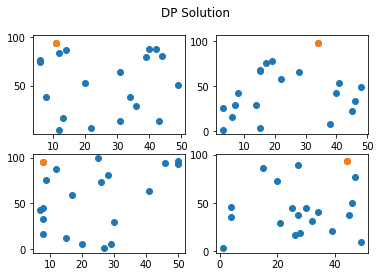

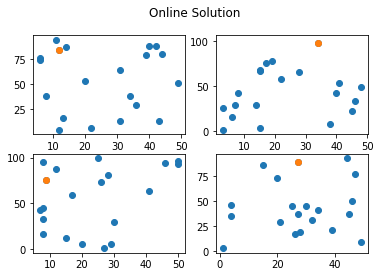

In [14]:
f, f_o = Result_Analyse.OptimalSolutionComparison(t)
f.show()
f_o.show()